# 01_Cleaning & EDA with Categorical Features

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings("ignore")

## Data

In [2]:
protests = pd.read_csv('../data/protests_original.csv')

In [3]:
print(protests.shape)
protests.head(3)

(17145, 31)


,id,country,ccode,year,region,protest,protestnumber,startday,startmonth,startyear,endday,endmonth,endyear,protesterviolence,location,participants_category,participants,protesteridentity,protesterdemand1,protesterdemand2,protesterdemand3,protesterdemand4,stateresponse1,stateresponse2,stateresponse3,stateresponse4,stateresponse5,stateresponse6,stateresponse7,sources,notes
0,201990001,Canada,20,1990,North America,1,1,15.0,1.0,1990.0,15.0,1.0,1990.0,0.0,national,NaN,1000s,unspecified,"political behavior, process",labor wage dispute,NaN,NaN,ignore,NaN,NaN,NaN,NaN,NaN,NaN,1. great canadian train journeys into history;...,canada s railway passenger system was finally ...
1,201990002,Canada,20,1990,North America,1,2,25.0,6.0,1990.0,25.0,6.0,1990.0,0.0,"Montreal, Quebec",NaN,1000,unspecified,"political behavior, process",NaN,NaN,NaN,ignore,NaN,NaN,NaN,NaN,NaN,NaN,1. autonomy s cry revived in quebec the new yo...,protestors were only identified as young peopl...
2,201990003,Canada,20,1990,North America,1,3,1.0,7.0,1990.0,1.0,7.0,1990.0,0.0,"Montreal, Quebec",NaN,500,separatist parti quebecois,"political behavior, process",NaN,NaN,NaN,ignore,NaN,NaN,NaN,NaN,NaN,NaN,1. quebec protest after queen calls for unity ...,"the queen, after calling on canadians to remai..."


In [4]:
protests.dtypes

id                         int64
country                   object
ccode                      int64
year                       int64
region                    object
protest                    int64
protestnumber              int64
startday                 float64
startmonth               float64
startyear                float64
endday                   float64
endmonth                 float64
endyear                  float64
protesterviolence        float64
location                  object
participants_category     object
participants              object
protesteridentity         object
protesterdemand1          object
protesterdemand2          object
protesterdemand3          object
protesterdemand4          object
stateresponse1            object
stateresponse2            object
stateresponse3            object
stateresponse4            object
stateresponse5            object
stateresponse6            object
stateresponse7            object
sources                   object
notes     

This dataset mainly consists of categorical variables. Although there are numerical variables, at a glance, it seems that they may not be useful, may work better combined, or may need to be converted into categorical variables.

In [5]:
protests.isnull().sum()

id                           0
country                      0
ccode                        0
year                         0
region                       0
protest                      0
protestnumber                0
startday                  1906
startmonth                1906
startyear                 1906
endday                    1906
endmonth                  1906
endyear                   1906
protesterviolence         1387
location                  1927
participants_category     7258
participants              1399
protesteridentity         2461
protesterdemand1          1907
protesterdemand2         14168
protesterdemand3         16762
protesterdemand4         16314
stateresponse1            1937
stateresponse2           14257
stateresponse3           16215
stateresponse4           16901
stateresponse5           16296
stateresponse6           17129
stateresponse7           16225
sources                   1910
notes                     1952
dtype: int64

In [6]:
# Total and % of null values

print(protests.isnull().sum().sum())
protests.isnull().sum().sum() / (17145*31)

177841


0.33460521735858284

### 'protest' column

The protest column labels a row either 0 or 1. Based on the data dictionary:

> Protest: is a dichotomous coding for whether or not there was a protest action in a particular period. The project defines a protest as a gathering of 50 or more people to make a demand of the government. A protest action must be targeted at the state or state policy. The project does not code protests in one country that are targeted at the policies of another country and in that sense, it captures only “home grown” protest activities targeted at state policies.

In [7]:
# Checking where protest = 0 and how that might affect the null values

print(protests[protests['protest'] == 0].shape)
protests[protests['protest'] == 0].isnull().sum()

(1906, 31)


id                          0
country                     0
ccode                       0
year                        0
region                      0
protest                     0
protestnumber               0
startday                 1906
startmonth               1906
startyear                1906
endday                   1906
endmonth                 1906
endyear                  1906
protesterviolence        1387
location                 1906
participants_category    1906
participants             1387
protesteridentity        1906
protesterdemand1         1906
protesterdemand2         1906
protesterdemand3         1906
protesterdemand4         1854
stateresponse1           1906
stateresponse2           1906
stateresponse3           1906
stateresponse4           1906
stateresponse5           1854
stateresponse6           1906
stateresponse7           1843
sources                  1906
notes                    1906
dtype: int64

There are 1906 rows labeled 0 in the protest column and those rows mostly contain null values in the columns of interest. They do not provide value and will be dropped.

In [8]:
# Dropping rows where protest = 0 and resetting index

protests = protests[protests['protest'] == 1]
protests.reset_index(inplace=True, drop=True)
protests.index = protests.index + 1

### 'startday', 'startmonth', 'startyear', 'endday', 'endmonth', 'endyear' columns

In [9]:
# Combining the seperate start/end day, month, year columns into 2 columns that we can work with

protests['startdate'] = protests['startyear'].astype(int).astype(str) + '-' + protests['startmonth'].astype(int).astype(str) + '-' + protests['startday'].astype(int).astype(str)
protests['enddate'] = protests['endyear'].astype(int).astype(str) + '-' + protests['endmonth'].astype(int).astype(str) + '-' + protests['endday'].astype(int).astype(str)

In [10]:
# Converting startdate and enddate to datetime to create a length_days column

protests['startdate'] = pd.to_datetime(protests['startdate'])
protests['enddate'] = pd.to_datetime(protests['enddate'])
protests['length_days'] = protests['enddate'] - protests['startdate']

In [11]:
# Creating a function that takes the timedelta64 dtype values and extracts the number of days as an int

def dt_to_days(dt):
  dt = str(dt).split(' ')[0:][0]
  return int(dt)

# Applying to the length_days columns

protests['length_days'] = protests['length_days'].apply(dt_to_days)

**Note:** The length_days column may not be wise to use. At a glance of the notes column, some rows contain duration information that differs from the dates recorded.

### Dropping columns of no use

In [12]:
protests = protests.drop(columns=['id', 
                                  'ccode',
                                  'protest',
                                  'protestnumber',
                                  'startday',
                                  'startmonth',
                                  'startyear',
                                  'endday',
                                  'endmonth',
                                  'endyear',
                                  'location',
                                  'sources'])

In [13]:
print(protests.shape)
protests.isnull().sum()

(15239, 22)


country                      0
year                         0
region                       0
protesterviolence            0
participants_category     5352
participants                12
protesteridentity          555
protesterdemand1             1
protesterdemand2         12262
protesterdemand3         14856
protesterdemand4         14460
stateresponse1              31
stateresponse2           12351
stateresponse3           14309
stateresponse4           14995
stateresponse5           14442
stateresponse6           15223
stateresponse7           14382
notes                       46
startdate                    0
enddate                      0
length_days                  0
dtype: int64

In [14]:
# Total null values and % of data

print(protests.isnull().sum().sum())
protests.isnull().sum().sum() / (15239*22)

133277


0.39753562927655717

### 'participants_category' and 'participants' columns

The participants_category and participants columns contain similar information that can be consolidated into 1 column. 

In [15]:
protests['participants_category'].isnull().sum()

5352

In [16]:
protests['participants_category'].unique()

array([nan, '50-99', '100-999', '2000-4999', '1000-1999', '5000-10000',
       '>10000'], dtype=object)

In [17]:
protests['participants'].isnull().sum()

12

In [18]:
protests['participants'].unique()

array(['1000s', '1000', '500', '100s', '950', '200', '110000', '10000s',
       '10000', '6000', '3000', '126000', '45000', '2000', '400', '10s',
       '250', '170000', '300', '12000', '1500', '50+', '250-300',
       'hundreds', 'more than 200', 'dozens', 'a group', 'about 300',
       'more than 500', 'busloads', '50', 'widespread', 'thousands',
       '100', '60', '100+', '80', '2500', '150', '100s-1000s', '8000',
       '100s-1000', '300-1000s', '4000', '15000', '600', '1500+',
       'about 2000', 'several hundred', 'tens of thousands', '270', '350',
       '5000', '20000', '100s-10000s', '100000', '30000', '70000',
       '1100-10000s', '80000', '200000', '100000s', '750000', '90000',
       '150000', '400000', '1000000', '1000+', '>50', '>50000',
       'more than 1500 detained', '11000', '230 families',
       'several dozen', '180', '50s', '35000', nan, 'Tens of thousands',
       '40000', '130', '60000', '23000+', '14000', '900', '1200', '1700',
       '700', '800', '5000+',

In [19]:
# Are there rows with nulls in both participants_category and participants columns?

protests[protests['participants'].isnull()]

,country,year,region,protesterviolence,participants_category,participants,protesteridentity,protesterdemand1,protesterdemand2,protesterdemand3,protesterdemand4,stateresponse1,stateresponse2,stateresponse3,stateresponse4,stateresponse5,stateresponse6,stateresponse7,notes,startdate,enddate,length_days
586,Guatemala,2005,Central America,1.0,NaN,NaN,NaN,"political behavior, process",NaN,NaN,NaN,crowd dispersal,NaN,NaN,NaN,NaN,NaN,NaN,eighth day of protests over trade agreement wi...,2005-03-16,2005-03-16,0
771,El Salvador,1997,Central America,0.0,NaN,NaN,bank depositors,"political behavior, process",NaN,NaN,NaN,ignore,NaN,NaN,NaN,NaN,NaN,NaN,protesters demand government refund losses fro...,1997-08-15,1997-08-15,0
782,El Salvador,2001,Central America,0.0,NaN,NaN,"unions, former guerrillas","political behavior, process",NaN,NaN,NaN,ignore,NaN,NaN,NaN,NaN,NaN,NaN,unions and former guerrillas marched in protes...,2001-05-01,2001-05-01,0
784,El Salvador,2003,Central America,1.0,NaN,NaN,striking health care workers,labor wage dispute,NaN,NaN,NaN,crowd dispersal,NaN,NaN,NaN,NaN,NaN,NaN,striking health workers stormed el salvador s ...,2003-02-20,2003-02-20,0
795,El Salvador,2006,Central America,1.0,NaN,NaN,students,"price increases, tax policy",NaN,NaN,NaN,crowd dispersal,shootings,killings,arrests,NaN,NaN,NaN,students protested increased prices in public ...,2006-07-05,2006-07-05,0
817,Nicaragua,1994,Central America,1.0,NaN,NaN,transportation workers,"price increases, tax policy",NaN,NaN,NaN,crowd dispersal,NaN,NaN,NaN,NaN,NaN,NaN,"transportation workers strike, protesting fuel...",1994-08-23,1994-08-30,7
3087,United Kingdom,2015,Europe,0.0,2000-4999,NaN,united cabbies group ucg,"political behavior, process",NaN,NaN,NaN,ignore,NaN,NaN,NaN,NaN,NaN,.,part of central london was brought to a stands...,2015-05-26,2015-05-26,0
3680,Belgium,2009,Europe,0.0,1000-1999,NaN,dairy farmers,"price increases, tax policy",NaN,NaN,NaN,ignore,NaN,NaN,NaN,NaN,NaN,NaN,although measures were taken by the eu to aid ...,2009-05-26,2009-05-26,0
8258,Burkina Faso,1997,Africa,0.0,100-999,NaN,university students,"political behavior, process",NaN,NaN,NaN,crowd dispersal,accomodation,NaN,NaN,NaN,NaN,NaN,"agence france presse, february 09, 1997, inter...",1997-02-01,1997-02-01,0
10549,Swaziland,2004,Africa,0.0,1000-1999,NaN,women activists,social restrictions,"political behavior, process",NaN,NaN,ignore,NaN,NaN,NaN,NaN,NaN,NaN,swazi women took to the streets in an unpreced...,2004-09-23,2004-09-23,0


In [20]:
# Dropping the rows with nulls in both participants_category and participants columns (7 rows), since articipant information is essential

protests = protests.dropna(subset=['participants_category', 'participants'], how='all')

### Creating/working with a subset of the protests dataframe -- null_pc

The participants_category column describes the range of the number of participants. 
- There are 7 categories: (50-99), (100-999), (1000-1999), (2000-4999), (5000-10000), (>10000)
- There are 5,342 missing values

The participants column is open-text. In some cases, it contains more detailed information on the number of participants. In other cases, it's more general.
- There are 12 missing values

Though the participants column has less missing values, the participants_category column will be better to work with: 
- #1) The vagueness of the participants column for some rows makes it impossible to obtain a specific value
- #2) The set categories will allow the models to learn better

The participants column will be used to fill in the participants_category missing values.

In [21]:
# Subsetting for a focused look at where participants_category = NaN

null_pc = protests[protests['participants_category'].isnull()]
print(null_pc.shape)

(5345, 22)


In [22]:
# Removing non-numeric characters from the participants column

null_pc['participants'] = null_pc['participants'].str.replace(r'[^0-9]+', '')
null_pc['participants']

1        1000
2        1000
3         500
4         100
5         950
         ... 
15230     500
15231    1000
15232    1000
15233    1000
15234    2000
Name: participants, Length: 5345, dtype: object

In [23]:
null_pc['participants'].unique()

array(['1000', '500', '100', '950', '200', '110000', '10000', '6000',
       '3000', '126000', '45000', '2000', '400', '10', '250', '170000',
       '300', '12000', '1500', '50', '80', '2500', '150', '1001000',
       '8000', '3001000', '4000', '15000', '600', '270', '350', '5000',
       '20000', '10010000', '100000', '30000', '70000', '110010000',
       '80000', '60', '200000', '750000', '90000', '150000', '400000',
       '1000000', '180', '35000', '40000', '130', '60000', '23000',
       '14000', '900', '1200', '1700', '700', '800', '280', '2400', '90',
       '50000', '100010000', '7000', '25000', '240000', '1100', '4500',
       '75000', '250000', '500000', '300000', '120000', '13800', '600000',
       '800000', '900000', '700000', '350000', '450000', '5000000',
       '53000', '280000', '72000', '270000', '1300000', '22000', '135000',
       '9000', '290000', '44000', '36000', '168000', '11000', '75',
       '1400', '4800', '2450', '6500', '181', '32000', '18500', '',
       '2

In [24]:
# Look into the values that look off in the above cell and grabbing their index

weird_values = ['3001000', 
                '1001000', 
                '10010000', 
                '110010000', 
                '100010000', 
                '150010000', 
                '100040000', 
                '2000200000', 
                '500050000', 
                '1100045000', 
                '75000170000', 
                '']

print(null_pc[np.isin(null_pc['participants'], weird_values)].shape)
print(null_pc[np.isin(null_pc['participants'], weird_values)].index)

(34, 22)
Int64Index([  178,   200,   201,   385,   419,   444,   458,   474,   956,
              962,   970,  1634,  7445,  7580, 10963, 10976, 11007, 11263,
            11505, 11508, 11514, 11521, 11522, 11523, 11537, 11543, 11616,
            11632, 12976, 13347, 13348, 14767, 15088, 15101],
           dtype='int64')


In [25]:
# Creating a list of the indices of the weird values and locating those rows in the original protest dataframe

weird_values_list = [  178,   200,   201,   385,   419,   444,   458,   474,   956,
              962,   970,  1634,  7445,  7580, 10963, 10976, 11007, 11263,
            11505, 11508, 11514, 11521, 11522, 11523, 11537, 11543, 11616,
            11632, 12976, 13347, 13348, 14767, 15088, 15101]

print(protests[protests.index.isin(weird_values_list)].shape)
protests[protests.index.isin(weird_values_list)]

(34, 22)


,country,year,region,protesterviolence,participants_category,participants,protesteridentity,protesterdemand1,protesterdemand2,protesterdemand3,protesterdemand4,stateresponse1,stateresponse2,stateresponse3,stateresponse4,stateresponse5,stateresponse6,stateresponse7,notes,startdate,enddate,length_days
178,Haiti,1997,North America,1.0,NaN,100s-1000s,grass roots groups,"price increases, tax policy",NaN,NaN,NaN,ignore,NaN,NaN,NaN,NaN,NaN,NaN,protests were against austerity measures.,1997-01-16,1997-01-16,0
200,Haiti,2003,North America,1.0,NaN,100s-1000,opposition politicians,removal of politician,NaN,NaN,NaN,crowd dispersal,shootings,NaN,NaN,NaN,NaN,NaN,police fired tear gas and exchanged gunfire wi...,2003-09-23,2003-10-14,21
201,Haiti,2003,North America,0.0,NaN,300-1000s,students,removal of politician,NaN,NaN,NaN,crowd dispersal,shootings,arrests,NaN,NaN,NaN,NaN,the largest anti government demonstration in y...,2003-12-11,2003-12-16,5
385,Mexico,1992,North America,1.0,NaN,100s-10000s,party of the democratic revolution,"political behavior, process",NaN,NaN,NaN,ignore,NaN,NaN,NaN,NaN,NaN,NaN,tens of thousands of angry opposition party mi...,1992-08-07,1992-09-15,39
419,Mexico,1997,North America,0.0,NaN,1100-10000s,zapatista rebels,"political behavior, process",NaN,NaN,NaN,ignore,NaN,NaN,NaN,NaN,NaN,NaN,this was a six day protest march by zapatista ...,1997-09-06,1997-09-12,6
444,Mexico,2002,North America,1.0,NaN,100s-1000,farmers,land farm issue,NaN,NaN,NaN,arrests,accomodation,NaN,NaN,NaN,NaN,NaN,"armed with machetes and homemade firebombs, hu...",2002-07-11,2002-07-15,4
458,Mexico,2006,North America,0.0,NaN,100s-1000s,democratic revolutionary party prd,"political behavior, process",NaN,NaN,NaN,ignore,NaN,NaN,NaN,NaN,NaN,NaN,hundreds of demonstrators demanding a recount ...,2006-07-31,2006-09-14,45
474,Mexico,2011,North America,0.0,NaN,100s-10000s,javier sicilia poet,"political behavior, process",NaN,NaN,NaN,ignore,NaN,NaN,NaN,NaN,NaN,NaN,the protest was a march from cuernavaca to mex...,2011-05-05,2011-05-08,3
956,Panama,2005,Central America,1.0,NaN,1000s-10000,"labor unions, womens groups, students","political behavior, process",NaN,NaN,NaN,arrests,crowd dispersal,shootings,NaN,NaN,NaN,NaN,protests were against government plans to incr...,2005-05-23,2005-05-28,5
962,Panama,2008,Central America,1.0,NaN,100s-1000s,construction workers,police brutality,NaN,NaN,NaN,crowd dispersal,arrests,shootings,NaN,NaN,NaN,NaN,protests were in response to police shooting a...,2008-02-14,2008-02-16,2


In [26]:
# Based on above results, the weird numbers are ranges or '.'. Changing to their lower bound, if a range, or NaN, if '.'.

null_pc['participants'] = null_pc['participants'].replace('3001000', '300')
null_pc['participants'] = null_pc['participants'].replace('1001000', '100')
null_pc['participants'] = null_pc['participants'].replace('10010000', '100')
null_pc['participants'] = null_pc['participants'].replace('110010000', '1000')
null_pc['participants'] = null_pc['participants'].replace('100010000', '1000')
null_pc['participants'] = null_pc['participants'].replace('150010000', '1500')
null_pc['participants'] = null_pc['participants'].replace('100040000', '10000')
null_pc['participants'] = null_pc['participants'].replace('2000200000', '2000')
null_pc['participants'] = null_pc['participants'].replace('500050000', '5000')
null_pc['participants'] = null_pc['participants'].replace('1100045000', '11000')
null_pc['participants'] = null_pc['participants'].replace('75000170000', '75000')
null_pc['participants'] = null_pc['participants'].replace('', np.nan)

In [27]:
# Dropping nulls in participant column as a result of the '' values that were replaced with NaN in the previous cell

null_pc = null_pc.dropna(subset=['participants'], how='all')

In [28]:
# Converting participants column from string dtype to int dtype so its compatible to use in an int-based loop

null_pc['participants'] = null_pc['participants'].astype(int)

In [29]:
# Looping through the participants column and assigning each row a category as seen in the participants_category column.

participants = []

for r in null_pc['participants']:
    if r < 100:
        participants.append('50-99')
    elif r < 1000:
        participants.append('100-999')
    elif r < 2000:
        participants.append('1000-1999')
    elif r < 5000:
        participants.append('2000-4999')
    elif r <= 10000:
        participants.append('5000-10000')
    else:
        participants.append('>10000')

null_pc['participants'] = participants

In [30]:
# Replacing NaN with 0 in the participants_category column so that it's compatiable with np.where in the next cell

null_pc['participants_category'] = null_pc['participants_category'].fillna(0)

In [31]:
# Using the participant column values to fill in the participants_category column where 0

null_pc['participants_category'] = np.where(null_pc['participants_category'] == 0, null_pc['participants'], null_pc['participants_category'])

### Updating protests dataframe

Because the filling in of the null values in the participants-category column was done on a subset dataframe, the original protests dataframe will need to reflect these changes.

In [32]:
# Dropping rows in participants_category with null values in the original protests dataframe

protests = protests.dropna(subset=['participants_category'], how='all')

In [33]:
# Concatenating protests and null_pc dataframes

protests2 = pd.concat([protests, null_pc], axis=0)
protests2.reset_index(drop=True, inplace=True)
protests2.index = protests2.index + 1

In [34]:
# Dropping participants column

protests2.drop(columns='participants', inplace=True)

In [35]:
protests2.shape

(15226, 21)

### state response columns

There are 7 state response columns meaning that for each row, there can be up to 7 state responses recorded. 

The 7 response types are:
- killings
- shootings
- beatings
- arrests
- crowd dispersal
- accomodation
- ignore

Because we only want to work with 1 state response column as the target, each row will be assigned its most severe response as the state response.

In [36]:
# Filling in NaN with 'na' in the stateresponse columns for compatibility in sequential code

columns_list = ['stateresponse1','stateresponse2','stateresponse3','stateresponse4','stateresponse5','stateresponse6','stateresponse7']

for col in columns_list:
    protests2[col] = protests2[col].fillna('na')

In [37]:
# Creating a column that holds all responses for a row

protests2['allresponses'] = protests2['stateresponse1'] + ', ' + \
                            protests2['stateresponse2'] + ', ' + \
                            protests2['stateresponse3'] + ', ' + \
                            protests2['stateresponse4'] + ', ' + \
                            protests2['stateresponse5'] + ', ' + \
                            protests2['stateresponse6'] + ', ' + \
                            protests2['stateresponse7'] + ', '

In [38]:
# Looping though the allresponses column so that each row is assigned it's most severe response

mostsevereresponse = []

for i in protests2['allresponses']:
    if 'killings' in i:
        mostsevereresponse.append('killings')
    elif 'shootings' in i:
        mostsevereresponse.append('shootings')
    elif 'beatings' in i:
        mostsevereresponse.append('beatings')
    elif 'arrests' in i:
        mostsevereresponse.append('arrests')
    elif 'crowd dispersal' in i:
        mostsevereresponse.append('crowd dispersal')
    elif 'accomodation' in i:
        mostsevereresponse.append('accomodation')
    elif 'ignore' in i:
        mostsevereresponse.append('ignore')
    else:
        mostsevereresponse.append(np.nan)

In [39]:
# Creating a single stateresponse column that holds the mostsevereresponse value

protests2['stateresponse'] = mostsevereresponse

In [40]:
# Dropping the original stateresponse and allresponses columns

protests2.drop(columns=['stateresponse1',
                        'stateresponse2',
                        'stateresponse3',
                        'stateresponse4',
                        'stateresponse5',
                        'stateresponse6',
                        'stateresponse7',
                        'allresponses'], inplace=True)

In [41]:
# Any null values in the stateresponse column?

protests2['stateresponse'].isnull().sum()

28

In [42]:
# Dropping the rows with nulls in the stateresponse column (28 rows)

protests2.dropna(subset=['stateresponse'], how='all', inplace=True)

In [43]:
# Final target class counts

protests2['stateresponse'].value_counts()

ignore             7984
crowd dispersal    2720
arrests            1566
accomodation       1032
killings            825
beatings            637
shootings           434
Name: stateresponse, dtype: int64

In [44]:
# Final target class %

protests2['stateresponse'].value_counts(normalize=True)

ignore             0.525332
crowd dispersal    0.178971
arrests            0.103040
accomodation       0.067904
killings           0.054283
beatings           0.041913
shootings          0.028556
Name: stateresponse, dtype: float64

Because of the severe class imbalances (the ignore class being the main cause) and the small dataset being worked with, it will be beneficial to group the classes into 2 or 3 classes.

**2 classes:**
- Negative (1): killings, shootings, beatings, arrests
- Non-Negative (0): crowd dispersal, accomodation, ignore

**3 classes:**
- Negative (2): killings, shootings, beatings, arrests
- Neutral (1): crowd dispersal, accomodation
- No Response (0): ignore

In [45]:
# Grouping the stateresponses into 2 classes: negative (1), non-negative (0)

response_category_2 = []

negative = ['killings','shootings','beatings','arrests']

for i in protests2['stateresponse']:
    if i in negative:
        response_category_2.append('1')
    else:
        response_category_2.append('0')

In [46]:
# Grouping the stateresponses into 3 classes: negative (2), neutral (1) and no response (0)

response_category_3 = []

negative = ['killings','shootings','beatings','arrests']
neutral = ['crowd dispersal','accomodation']

for i in protests2['stateresponse']:
    if i in negative:
        response_category_3.append('2')
    elif i in neutral:
        response_category_3.append('1')
    else:
        response_category_3.append('0')

In [47]:
# Creating a 2 class response_category column in the dataframe

protests2['response_category_2'] = response_category_2

In [48]:
# Creating a 3 class response_category column in the dataframe

protests2['response_category_3'] = response_category_3

In [49]:
# Updated dataframe shape and null counts

print(protests2.shape)
protests2.isnull().sum()

(15198, 17)


country                      0
year                         0
region                       0
protesterviolence            0
participants_category        0
protesteridentity          553
protesterdemand1             0
protesterdemand2         12231
protesterdemand3         14816
protesterdemand4         14419
notes                       46
startdate                    0
enddate                      0
length_days                  0
stateresponse                0
response_category_2          0
response_category_3          0
dtype: int64

In [50]:
# Total null values and % of data

print(protests2.isnull().sum().sum())
protests2.isnull().sum().sum() / (15198*15)

42065


0.18451989296837304

### protester demand columns

Similar to the state response columns, there are 4 protester demand columns meaning that for each row, there can be up to 4 protester demands recorded.

There are 7 demand types:
- political behavior, process
- labor wage dispute
- police brutality
- social restrictions
- land farm issue
- removal of politician
- price increases, tax policy

Unlike the state response columns, we do not want to reduce the demands down to 1 per row or group them, because they cannot be ranked nor are they closely related. We want to work with all the demands. As such, a column for each demand will be created and will contain binary values indicating whether or not the demand was made.

In [51]:
# A look at the different protester demands

protests2['protesterdemand1'].unique()

array(['political behavior, process', 'labor wage dispute',
       'police brutality', 'social restrictions', 'land farm issue',
       'removal of politician', 'price increases, tax policy'],
      dtype=object)

In [52]:
# Filling in NaN with 'na' in the stateresponse columns for compatibility in sequential code

columns_list = ['protesterdemand1','protesterdemand2','protesterdemand3','protesterdemand4']

for col in columns_list:
    protests2[col] = protests2[col].fillna('na')

In [53]:
# Creating a column that holds all demands for a row

protests2['alldemands'] = protests2['protesterdemand1'] + ', ' + \
                          protests2['protesterdemand2'] + ', ' + \
                          protests2['protesterdemand3'] + ', ' + \
                          protests2['protesterdemand4']

In [54]:
# Creating a list variable to hold all rows with 'political behavior, process' as a demand

demand_political_behavior_process = []

for i in protests2['alldemands']:
    if 'political behavior, process' in i:
        demand_political_behavior_process.append(1)
    else:
        demand_political_behavior_process.append(0)

In [55]:
# Creating a list variable to hold all rows with 'labor wage dispute' as a demand

demand_labor_wage_dispute = []

for i in protests2['alldemands']:
    if 'labor wage dispute' in i:
        demand_labor_wage_dispute.append(1)
    else:
        demand_labor_wage_dispute.append(0)

In [56]:
# Creating a list variable to hold all rows with 'police brutality' as a demand

demand_police_brutality = []

for i in protests2['alldemands']:
    if 'police brutality' in i:
        demand_police_brutality.append(1)
    else:
        demand_police_brutality.append(0)

In [57]:
# Creating a list variable to hold all rows with 'social restrictions' as a demand

demand_social_restrictions = []

for i in protests2['alldemands']:
    if 'social restrictions' in i:
        demand_social_restrictions.append(1)
    else:
        demand_social_restrictions.append(0)

In [58]:
# Creating a list variable to hold all rows with 'land farm issue' as a demand

demand_land_farm_issue = []

for i in protests2['alldemands']:
    if 'land farm issue' in i:
        demand_land_farm_issue.append(1)
    else:
        demand_land_farm_issue.append(0)

In [59]:
# Creating a list variable to hold all rows with 'removal of politician' as a demand

demand_politician_removal = []

for i in protests2['alldemands']:
    if 'removal of politician' in i:
        demand_politician_removal.append(1)
    else:
        demand_politician_removal.append(0)

In [60]:
# Creating a list variable to hold all rows with 'price increases, tax policy' as a demand

demand_price_inc_tax_policy = []

for i in protests2['alldemands']:
    if 'price increases, tax policy' in i:
        demand_price_inc_tax_policy.append(1)
    else:
        demand_price_inc_tax_policy.append(0)

In [61]:
# Creating columns in the protests2 dataframe for each of the demands

protests2['demand_political_behavior_process'] = demand_political_behavior_process
protests2['demand_labor_wage_dispute'] = demand_labor_wage_dispute
protests2['demand_police_brutality'] = demand_police_brutality
protests2['demand_social_restrictions'] = demand_social_restrictions
protests2['demand_land_farm_issue'] = demand_land_farm_issue
protests2['demand_politician_removal'] = demand_politician_removal
protests2['demand_price_inc_tax_policy'] = demand_price_inc_tax_policy

In [62]:
# Dropping the original protester demand columns

protests2.drop(columns=['protesterdemand1',
                        'protesterdemand2',
                        'protesterdemand3',
                        'protesterdemand4', 
                        'alldemands'], inplace=True)

### Organizing columns

In [63]:
# Rearranging columns in the df

protests2.insert(1, 'region', protests2.pop('region'))
protests2.insert(3, 'startdate', protests2.pop('startdate'))
protests2.insert(4, 'enddate', protests2.pop('enddate'))
protests2.insert(5, 'length_days', protests2.pop('length_days'))
protests2.insert(19, 'stateresponse', protests2.pop('stateresponse'))
protests2.insert(19, 'response_category_2', protests2.pop('response_category_2'))
protests2.insert(19, 'response_category_3', protests2.pop('response_category_3'))
protests2.insert(19, 'notes', protests2.pop('notes'))

In [64]:
# Converting the protesterviolence column dtype from float to int

protests2['protesterviolence'] = protests2['protesterviolence'].astype(int)

# Converting response category columns from object to int

protests2['response_category_2'] = protests2['response_category_2'].astype(int)
protests2['response_category_3'] = protests2['response_category_3'].astype(int)

In [65]:
# Re-naming protests2 dataframe back to protests

protests = protests2

In [66]:
# Writing clean protests dataframe to a CSV

# protests.to_csv('../data/protests_clean.csv', index=False)

## Exploratory Data Analysis

### Target Variable

Because there are 2 grouping options for the state response (2 or 3 classes), both will be explored.

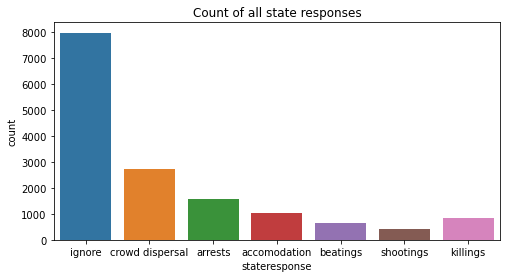

In [67]:
# All state responses (count plot)

plt.figure(figsize=(8,4))
sns.countplot(data = protests, x = 'stateresponse')
plt.title('Count of all state responses');

The classes are severely imbalanced. 'Ignore' alone makes up about half of all responses. If all classes were to be used during modeling, the model would have a very hard time learning from the classes with fewer counts.

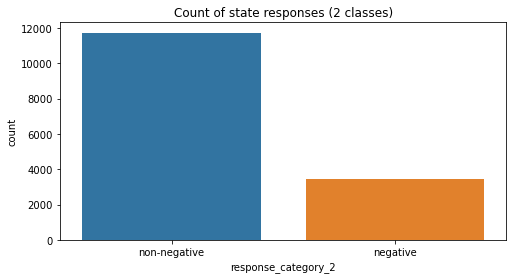

In [68]:
# 2 class state responses (count plot)

plt.figure(figsize=(8,4))
sns.countplot(data = protests, x = 'response_category_2')
plt.title('Count of state responses (2 classes)')
plt.xticks([0, 1], ['non-negative', 'negative']);

Here, the negative class consists of killings, shootings, beatings and arrests, and the non-negative class consists of crowd dispersal, accomodation and ignore.

Grouping the classes in 2 makes it so that the less frequent class in this scenario has a decent count that can be learned from, but the classes are still severely imbalanced. The individual negative classes all had lower counts to begin with, and the individual non-negative classes had higher counts to begin with. This makes the non-negative class almost 3 times as large as the negative class.

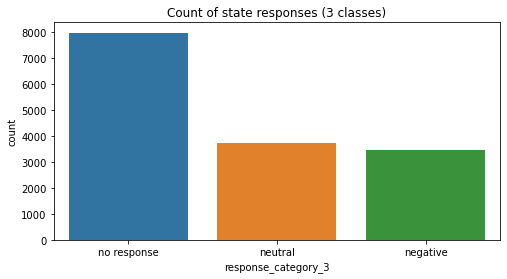

In [69]:
# 3 class state responses (count plot)

plt.figure(figsize=(8,4))
sns.countplot(data = protests, x = 'response_category_3')
plt.title('Count of state responses (3 classes)')
plt.xticks([0, 1, 2], ['no response', 'neutral', 'negative']);

Here, the negative class still consists of killings, shootings, beatings and arrests, but ignore has been separated out from the non-negative class and is now its own class. As a result, a third class is now in the mix, neutral, and it consists of crowd dispersal and accomodation.

Grouping the classes in 3 helps balance things out a bit more, but ignore remains as the main cause of the imbalance and is 2 times as large as the neutral and negative classes.

### Predictive Variables

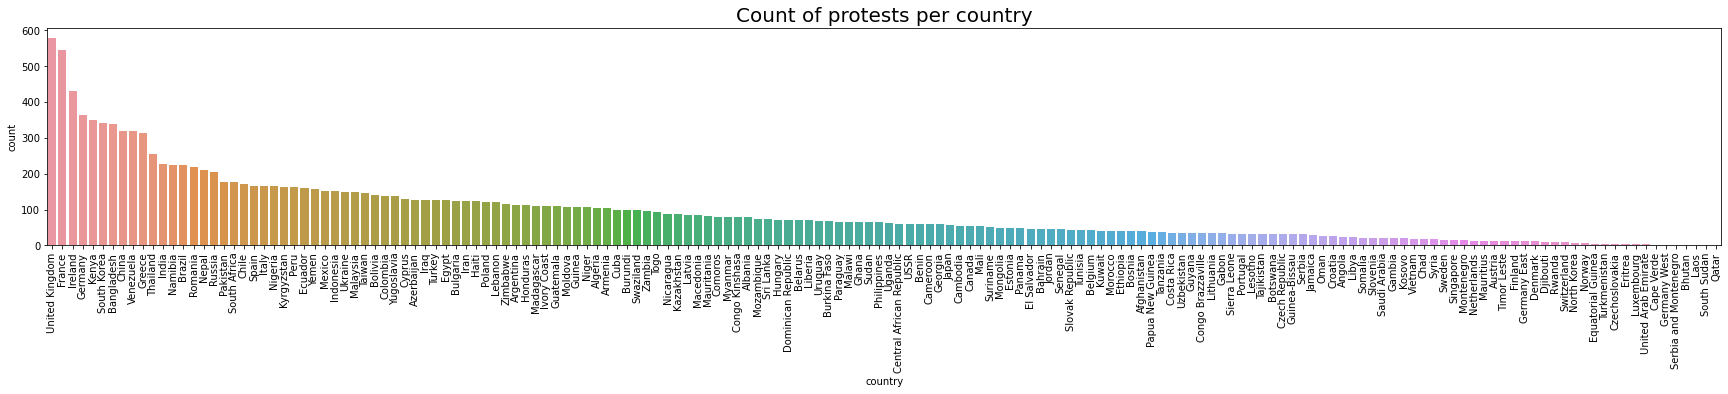

In [81]:
# Country (count plot)

plt.figure(figsize=(30,4))
sns.countplot(data = protests, x = 'country', order = protests['country'].value_counts().index)
plt.title('Count of protests per country', fontsize = 20)
plt.xticks(rotation=90);

There are too many countries to consider the country feature as one that should be One-Hot-Encoded. However, we can see that many protests are concentrated in a few countries per region. This leaves the majority of countries to have little to hardly any protests that would make it very hard for the model to learn from.

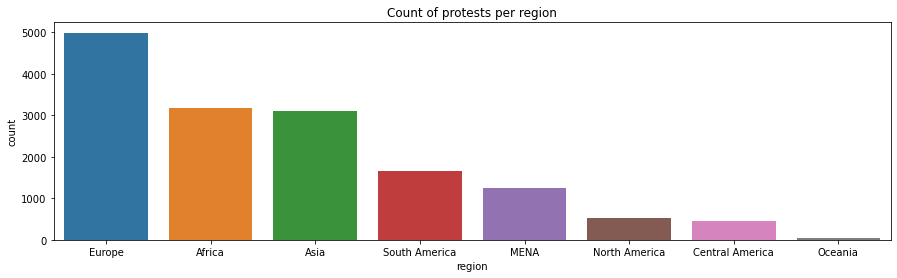

In [71]:
# Region (count plot)

plt.figure(figsize=(15,4))
sns.countplot(data = protests, x = 'region', order = protests['region'].value_counts().index)
plt.title('Count of protests per region');

Europe has the most protests recorded. Africa and Asia both also have a good number of protests recorded, but the number of protests per region after that quickly starts diminishing. But to group any more than this wouldn't make much sense.

There are only 8 regions making it a feature that could be useful to One-Hot-Encode. And it's helpful that countries aren't just being grouped by continent. Central America and MENA could have been included in their respective continents, but with their unique government and social structures it makes sense giving them their own category.

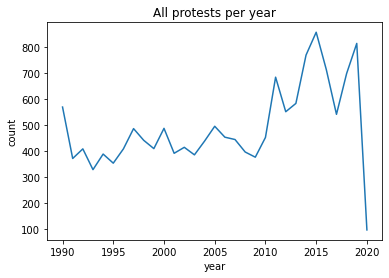

In [85]:
# Year - All Protests (line plot)

protests['year'].value_counts().sort_index().plot()
plt.title('All protests per year')
plt.xlabel('year')
plt.ylabel('count');

The number of protests fluctuated from 1990-2010 but in general, increased. After 2010, however, they increased dramatically.

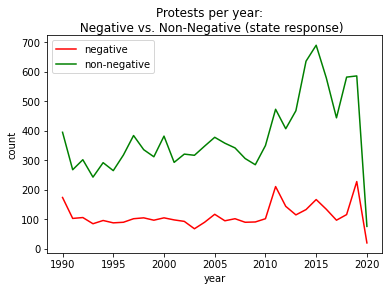

In [86]:
# Year - 2 Classes (line plot)

fig, ax = plt.subplots()

ax.plot(protests[protests['response_category_2']== 1]['year'].value_counts().sort_index(), color='r', label='negative')
ax.plot(protests[protests['response_category_2']== 0]['year'].value_counts().sort_index(), color='g', label='non-negative')

ax.set_xlabel('year')
ax.set_ylabel('count')

fig.suptitle('Protests per year:\n Negative vs. Non-Negative (state response)')

ax.legend();

Splitting apart the protests in 2 classes (negative and non-negative) does not offer much insight. The same trends are seen between the 2 classes, though there are more fluctuations with the non-negative class.

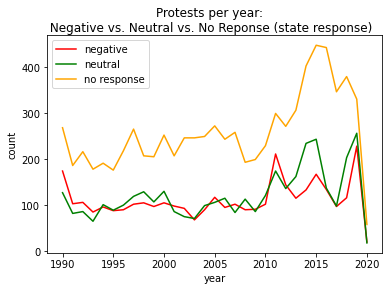

In [87]:
# Year - 3 Classes (line plot)

fig, ax = plt.subplots()

ax.plot(protests[protests['response_category_3']== 2]['year'].value_counts().sort_index(), color='r', label='negative')
ax.plot(protests[protests['response_category_3']== 1]['year'].value_counts().sort_index(), color='g', label='neutral')
ax.plot(protests[protests['response_category_3']== 0]['year'].value_counts().sort_index(), color='orange', label='no response')

ax.set_xlabel('year')
ax.set_ylabel('count')

fig.suptitle('Protests per year:\n Negative vs. Neutral vs. No Reponse (state response)')

ax.legend();

Similar to splitting apart the protests in 2 classes, splitting into 3 classes (negative, neutral and no response) does not offer much insight either.

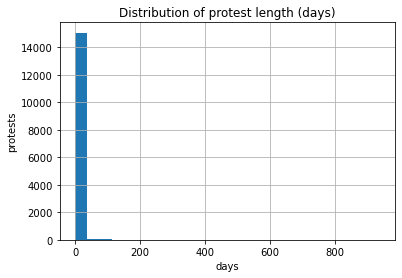

In [75]:
# Length_days (histogram)

protests['length_days'].hist(bins=25)
plt.title('Distribution of protest length (days)')
plt.xlabel('days')
plt.ylabel('protests');

A previous observation of the length_days feature was that it may not be helpful because of inaccurate date records. The histogram further cements the lack of usefulness of the feature. The vast majority of the protests are recorded to have started and ended the same day.

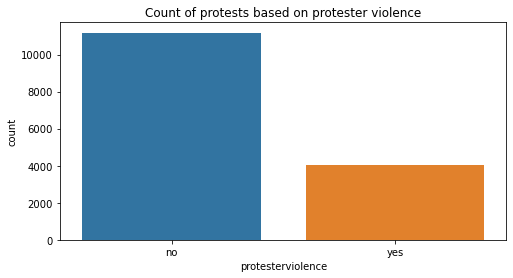

In [76]:
# Protester_violence (count plot)

plt.figure(figsize=(8,4))
sns.countplot(data = protests, x = 'protesterviolence')
plt.title('Count of protests based on protester violence')
plt.xticks([0, 1], ['no', 'yes']);

About 1/3 of the protests experienced protester violence.

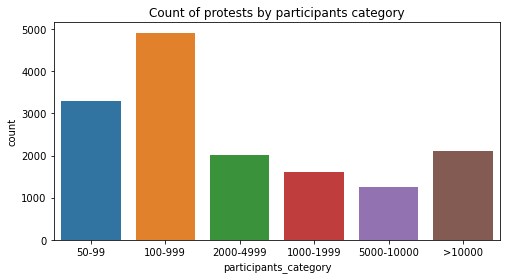

In [77]:
# Participants_category (count plot)

plt.figure(figsize=(8,4))
sns.countplot(data = protests, x = 'participants_category')
plt.title('Count of protests by participants category');

Based on the participants_category counts, this feature seems like it could be a good predictor. The 100-999 category has the most protests, but the other categories have a decent amount of protests that the model can learn from.

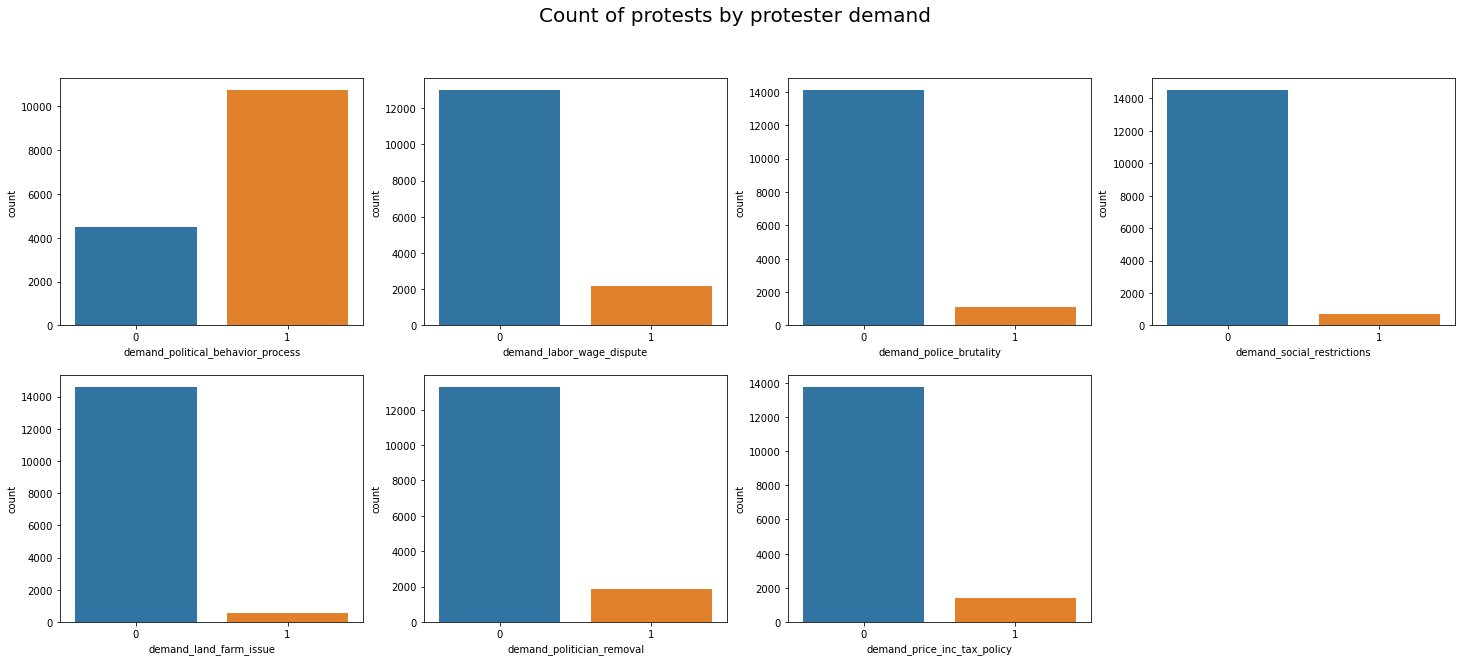

In [78]:
# Protester Demands (count plots)

fig = plt.figure(figsize = (25,10))

ax1 = fig.add_subplot(2,4,1)
sns.countplot(data = protests, x = 'demand_political_behavior_process', ax=ax1)

ax2 = fig.add_subplot(2,4,2)
sns.countplot(data = protests, x = 'demand_labor_wage_dispute', ax=ax2)

ax3 = fig.add_subplot(2,4,3)
sns.countplot(data = protests, x = 'demand_police_brutality', ax=ax3)

ax4 = fig.add_subplot(2,4,4)
sns.countplot(data = protests, x = 'demand_social_restrictions', ax=ax4)

ax5 = fig.add_subplot(2,4,5)
sns.countplot(data = protests, x = 'demand_land_farm_issue', ax=ax5)

ax6 = fig.add_subplot(2,4,6)
sns.countplot(data = protests, x = 'demand_politician_removal', ax=ax6)

ax7 = fig.add_subplot(2,4,7)
sns.countplot(data = protests, x = 'demand_price_inc_tax_policy', ax=ax7)

fig.suptitle('Count of protests by protester demand', fontsize=20);

Protests involved the political behavior/process demand more than any other demand. All other demands were seen far less frequently. This may be a difficult predictor to learn from based on these counts.

### EDA Summary

Earlier, it was noted that this dataset mainly consisted of categorical variables. Although there were numerical variables, they were either not useful (id, ccode, etc.), consolidated (start/end month, day and year) or converted into categorical variables (year) during the cleaning process. This made it difficult to gain meaningful insights and identify strong predictors. This also means that modeling on this data will be difficult, and it's not likely to return a well-performing model.